<a href="https://colab.research.google.com/github/BoHye0202/Kaggle/blob/main/1.Titanic/Titanic_1_case1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 참고 사이트
1. https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

2. https://www.kaggle.com/startupsci/titanic-data-science-solutions

3. https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python


# 1. 데이터 불러오기

In [2]:
# # !pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"choibohye","key":"c507dd09a050b13f257cb73bcf1378f4"}'}

In [3]:
ls -1ha kaggle.json

kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        102           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        212           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        415           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2831           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      21852            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5783           False  
connectx

In [5]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 10.7MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.90MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 52.3MB/s]


In [6]:
!ls

 gender_submission.csv	 kaggle.json   test.csv
'kaggle (1).json'	 sample_data   train.csv


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [8]:
url_train = '/content/train.csv'
url_test = '/content/test.csv'
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

1. traindata의 feature는 다음과 같다

  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

  위 데이터에서 사용할 features는 Pcalss, Age, SibSp, Parch, Fare이다

2. target label은 survived이다.

In [9]:
# 어느 코드에서나 기본세팅 (matplotlib 기본설정값 대신 사용) 
plt.style.use('seaborn') # 항상 사용 
sns.set(font_scale=2.5) # 항상 사용

# 결측데이터를 시각화해서 보여준다
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 2. Dataset 확인
null data를 확인하고 향후 수정

In [10]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2-1.Null Data Check
**사용 Feature**

Pclass, Age, SibSp, Parch, Fare

**Target Label**

Survived


**Cabin Feature**

Cabin Feature는 Nan이 대략 80%이므로 생존에 영향을 미칠 중요한 정보를 얻어내기 쉽지 않다
따라서, 우리가 세우려는 모델에 포함시키지 않는다.

### Null Data Check 1
train, test set: describe
count를 보면 null data가 존재하는 것 같다

In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Null Data Check 2
- Train set과 Test set에서 Age와 Cabin이 비슷한 수치로 null data 존재
- Train set에만 Embarked 0.22% null data 존재

In [13]:
# Train set
for col in df_train.columns:
  msg = 'column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of Nan value: 0.00%
column:   Survived	 Percent of Nan value: 0.00%
column:     Pclass	 Percent of Nan value: 0.00%
column:       Name	 Percent of Nan value: 0.00%
column:        Sex	 Percent of Nan value: 0.00%
column:        Age	 Percent of Nan value: 19.87%
column:      SibSp	 Percent of Nan value: 0.00%
column:      Parch	 Percent of Nan value: 0.00%
column:     Ticket	 Percent of Nan value: 0.00%
column:       Fare	 Percent of Nan value: 0.00%
column:      Cabin	 Percent of Nan value: 77.10%
column:   Embarked	 Percent of Nan value: 0.22%


In [14]:
# Test set
for col in df_test.columns:
  msg = 'column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of Nan value: 0.00%
column:     Pclass	 Percent of Nan value: 0.00%
column:       Name	 Percent of Nan value: 0.00%
column:        Sex	 Percent of Nan value: 0.00%
column:        Age	 Percent of Nan value: 20.57%
column:      SibSp	 Percent of Nan value: 0.00%
column:      Parch	 Percent of Nan value: 0.00%
column:     Ticket	 Percent of Nan value: 0.00%
column:       Fare	 Percent of Nan value: 0.24%
column:      Cabin	 Percent of Nan value: 78.23%
column:   Embarked	 Percent of Nan value: 0.00%


### Null Data Check 3

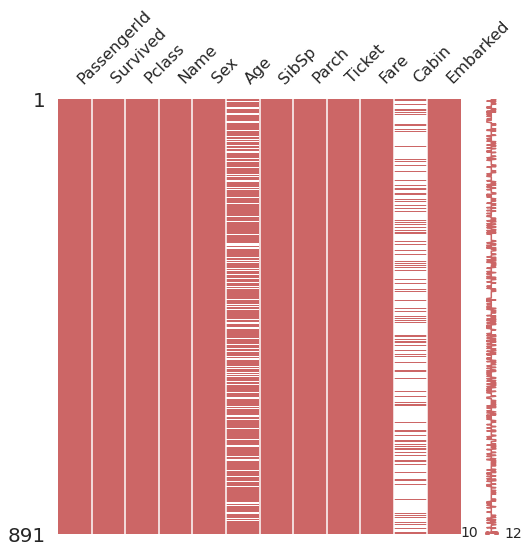

In [15]:
msno.matrix(df=df_train.iloc[:,:],figsize = (8,8), color=(0.8, 0.4,0.4));

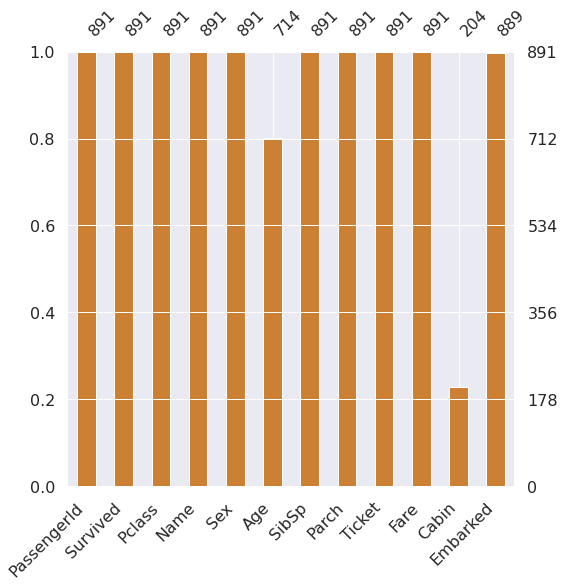

In [16]:
msno.bar(df=df_train.iloc[:,:],figsize = (8,8), color=(0.8,0.5,0.2))

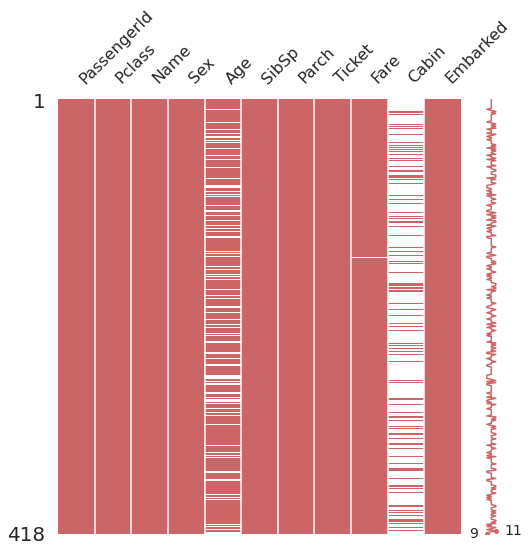

In [17]:
msno.matrix(df=df_test.iloc[:,:], figsize=(8,8), color=[0.8,0.4,0.4])

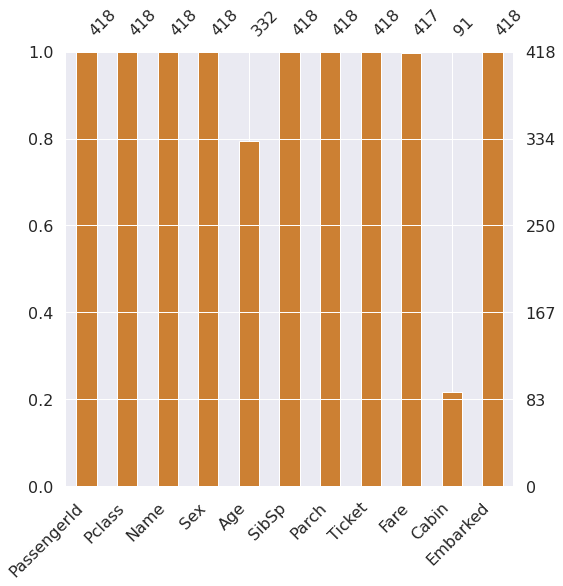

In [18]:
msno.bar(df=df_test.iloc[:,:],figsize=(8,8), color=(0.8,0.5,0.2))

## 2-2. Target Label 확인
- Target Label이 어떤 distribution을 가지고 있는지 확인
- binary classification 문제의 경우에서 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있다.

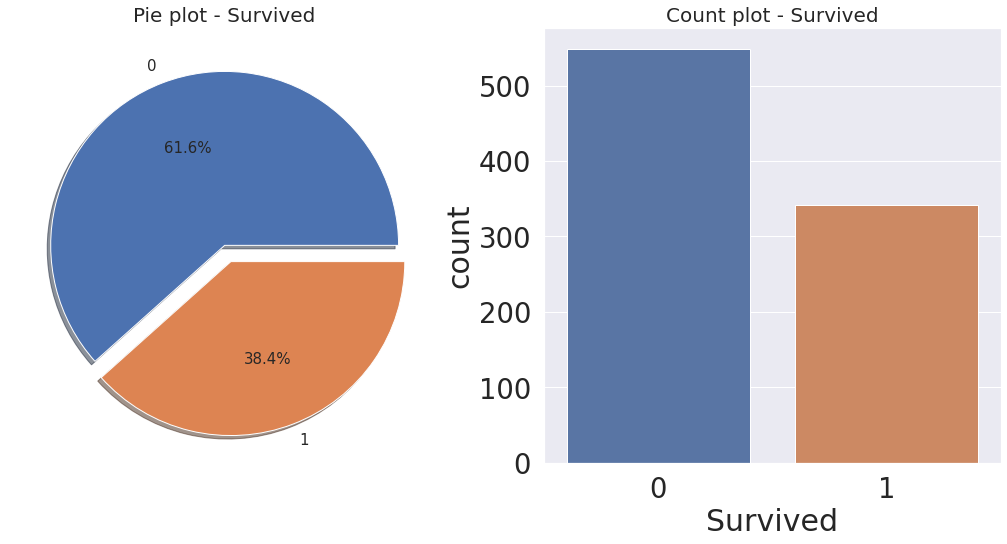

In [19]:
f, ax = plt.subplots(1,2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%', ax = ax[0], shadow=True, fontsize=15);

ax[0].set_title('Pie plot - Survived',fontsize=20)
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived',fontsize=20)

plt.show();

- 6:4 비율로 죽은 사람이 많다


# 3. EDA
- 여러 feature들을 개별적으로 분석
- feauture들 간의 상관관계를 확인
- 시각화 툴을 사용하여 insight를 얻는다


## 3-1. P-class
- 카테고리이면서, 순서가 있는 데이터 타입
- Pclass에 따른 생존률의 차이 확인

In [20]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [21]:
# 216명 중 생존한 (survived=1) 사람의 총합을 출력
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [22]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [23]:
# 위 두 표를 crosstab으로 쉽게 확인하기
pd.crosstab(df_train['Pclass'],df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


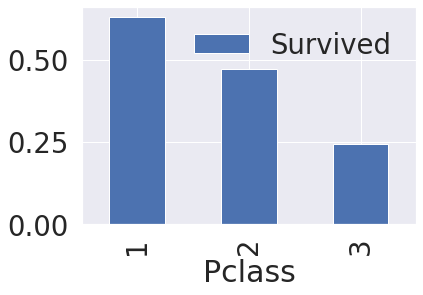

In [24]:
# 아래의 표에서 Pclass가 높을수록 생존률이 높은 것을 확인할 수 있다
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending = False).plot.bar();

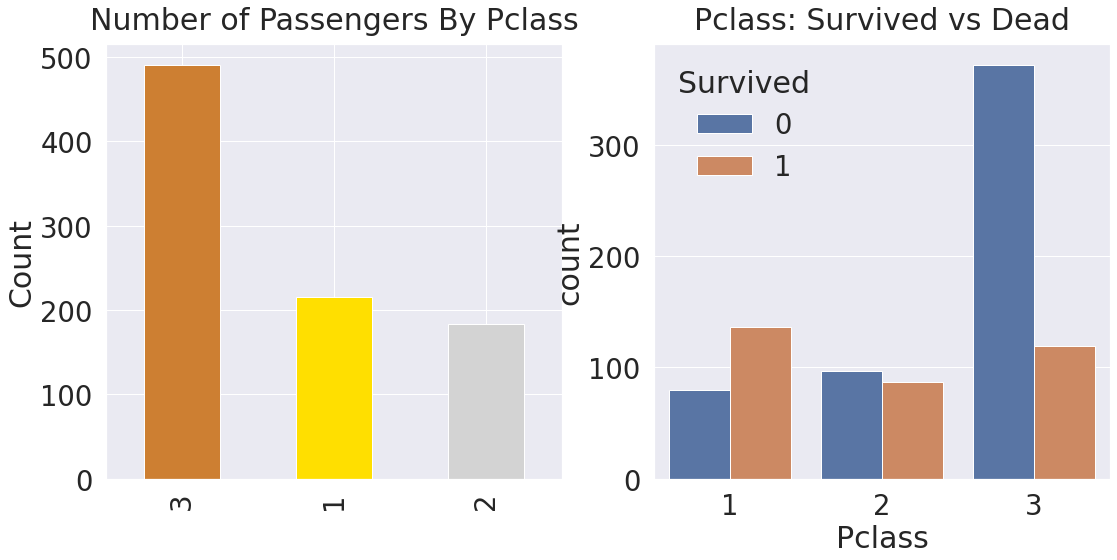

In [25]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show();

## 3-2. Sex
- 여자 생존률이 더 높다

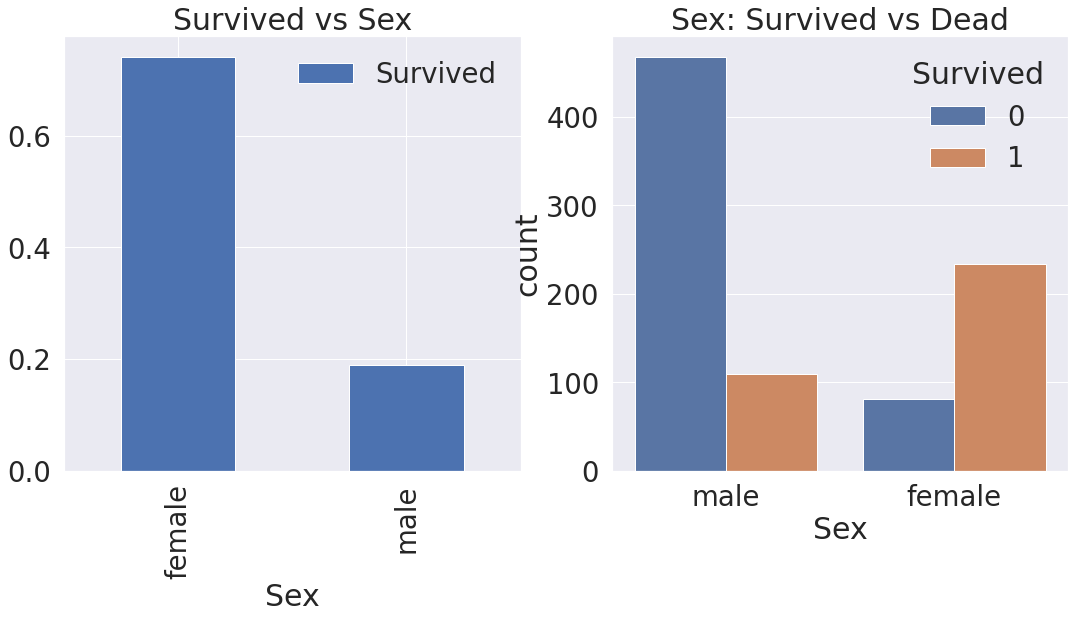

In [26]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [27]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [28]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 3-3. Both Sex and Pclass
- 모든 클래스의 female의 살 확률이 male보다 높다
- 성별에 관계없이 클래스가 높을수록 살 확률이 높다

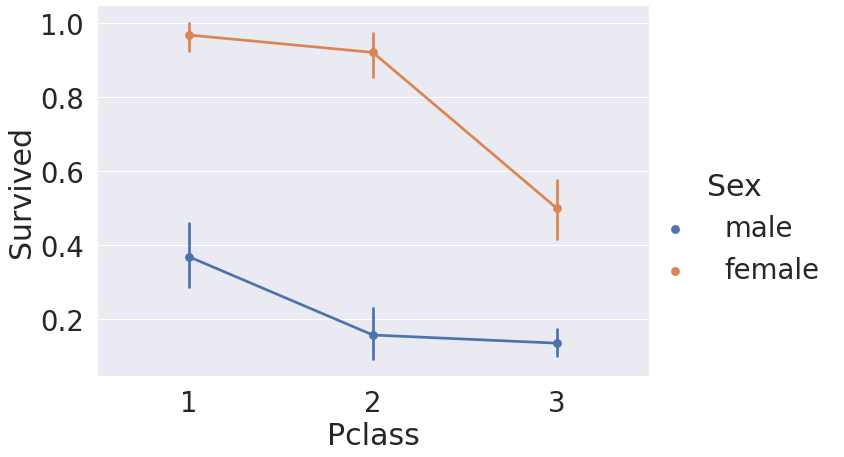

In [29]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5);

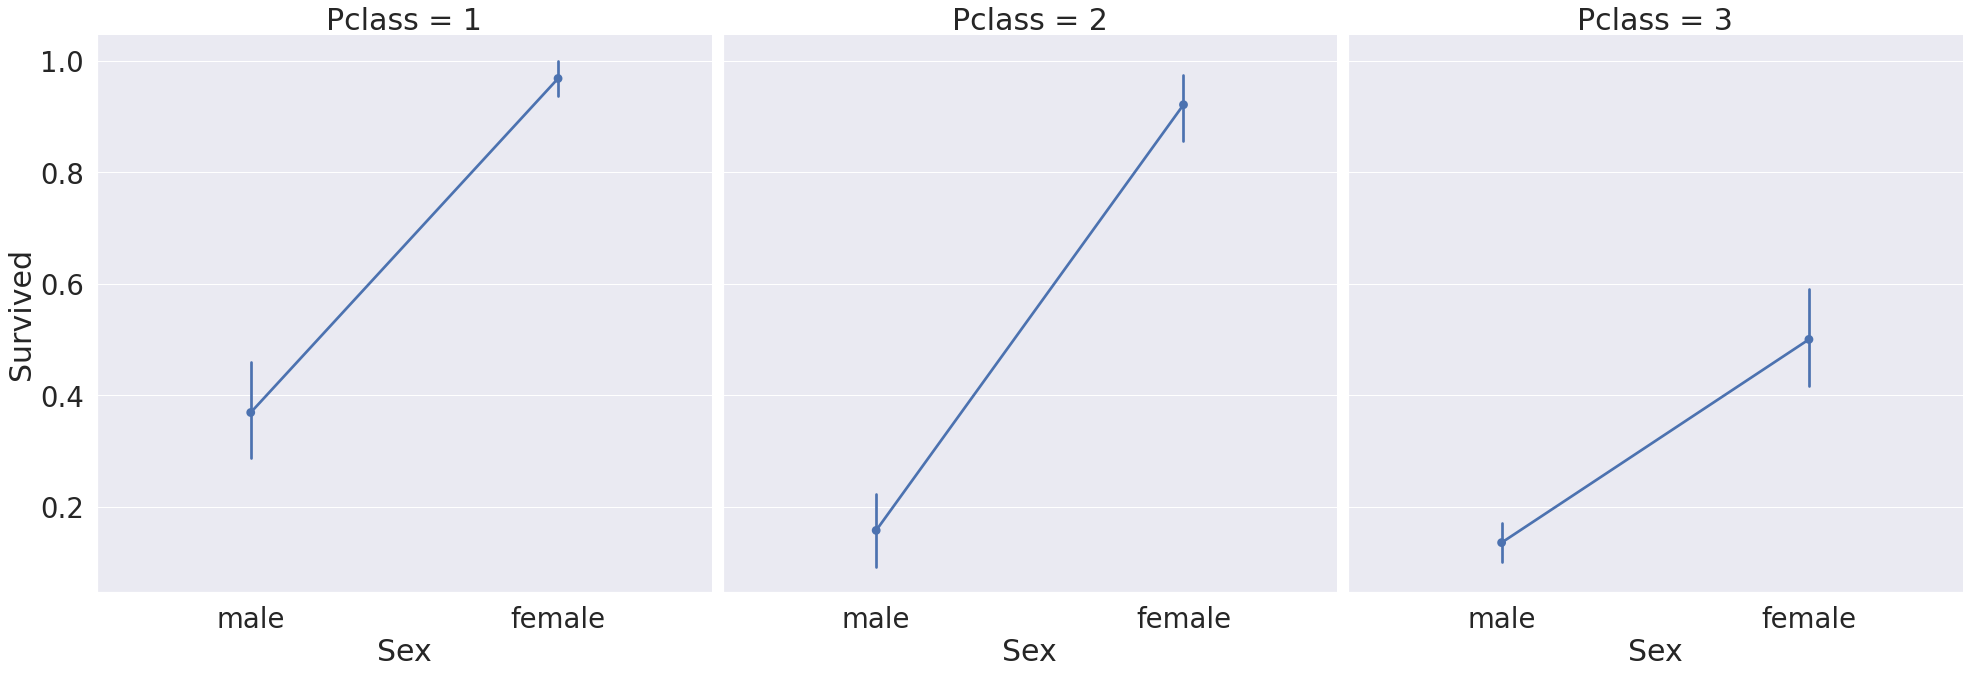

In [30]:
# hue대신 column
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1, fontsize=15);

## 3-4. Age
- 생존자 중 나이가 어린 경우가 많다

In [31]:
print('제일 나이 많은 탑승객: {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


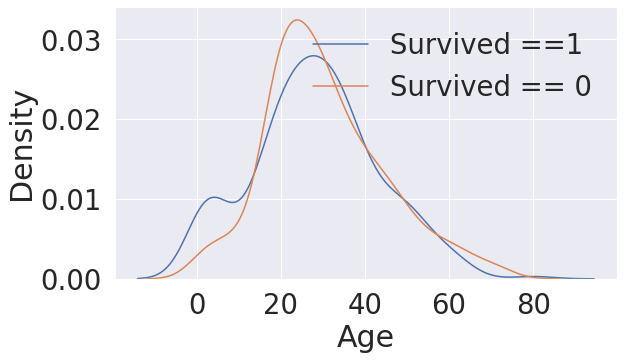

In [32]:
# 생존에 따른 Age의 histogram
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived ==1','Survived == 0'])
plt.show();

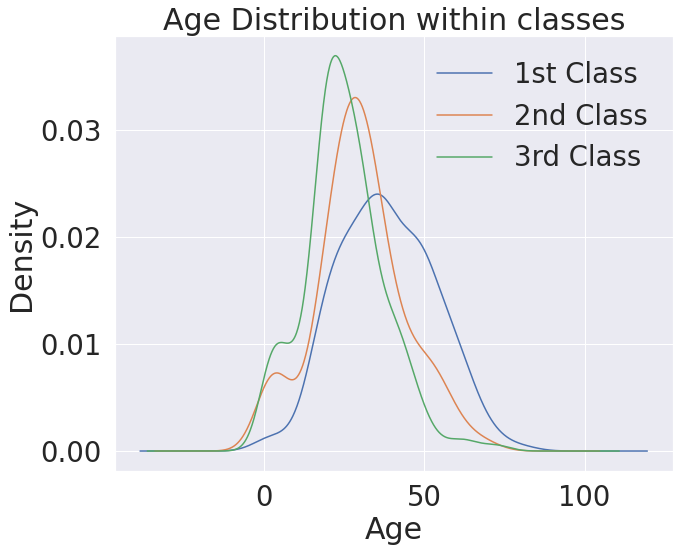

In [33]:
# Age distribution withing classes
plt.figure(figsize=(10,8))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class']);

# 클래스가 높을수록 나이많은 사람의 비중이 커진다

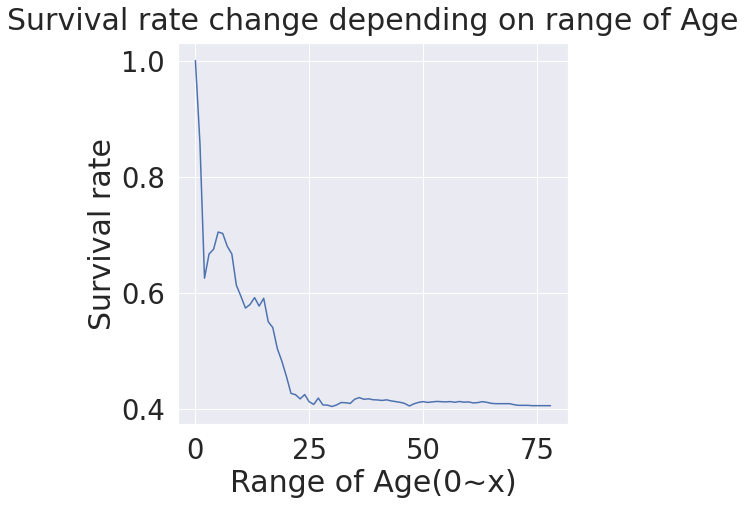

In [34]:
# 나이대가 변하면서 생존률이 어떻게 되는지 확인
## 나이범위를 점점 넓혀가며 생존률 확인

cummulate_survival_ratio = []
for i in range(1,80):
  cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show();

# 나이가 어릴수록 생존률이 확실히 높다

## 3-5. Pclass + Sex + Age
- seaborn의 violinplot으로 시각화
- x축은 Pclass + Sex
- y축은 Age


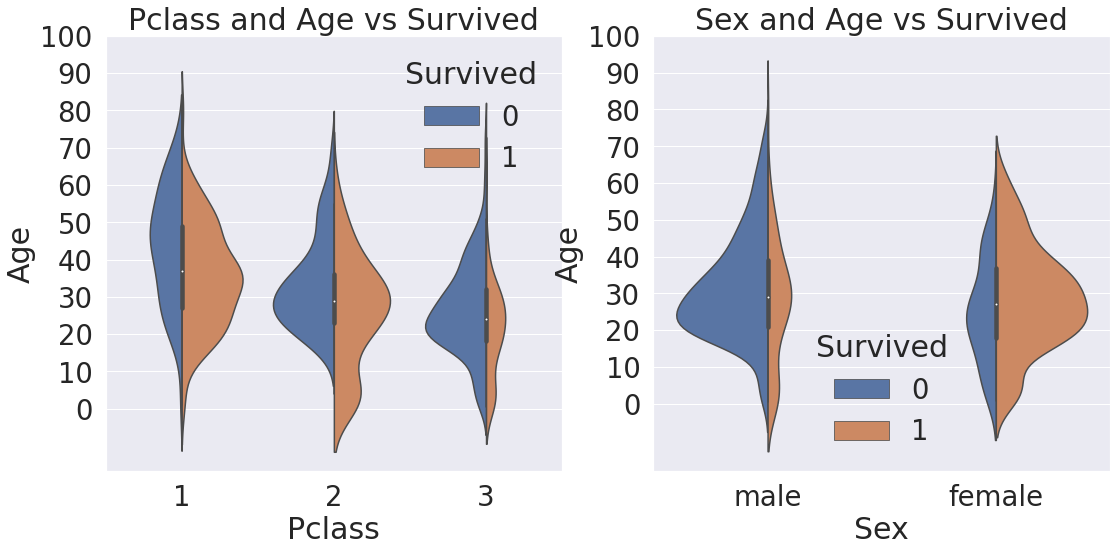

In [35]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show();

### 왼쪽 그림
Pclass 별로 Age의 distribution이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프

### 오른쪽 그림
Sex, 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프

- 생존만 봤을 떄, 모든 클래스에서 나이가 어릴수록 생존을 많이 한 것을 볼 수 있다
- 오른쪽 그림을 보면 여자의 생존이 많은 것을 볼 수 있다
- 결론: 여자와 아이를 먼저 챙겼다

## 3-6. Embarked
- 탑승한 항구를 나타낸다
- 조금의 차이는 있지만 생존률은 비슷한 것 같다
- 모델에 얼마나 큰 영향을 미칠지는 모르지만 일단 사용
  모델을 만들고 나면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 확인해볼 수 있다

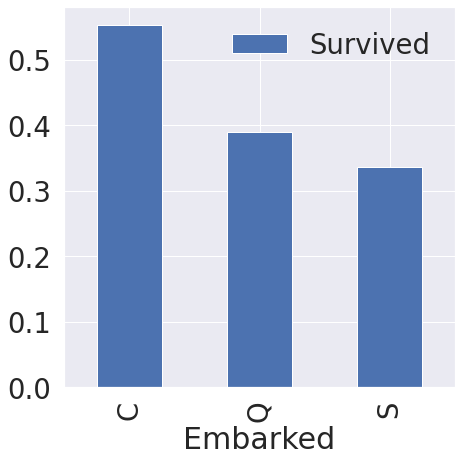

In [36]:
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax);

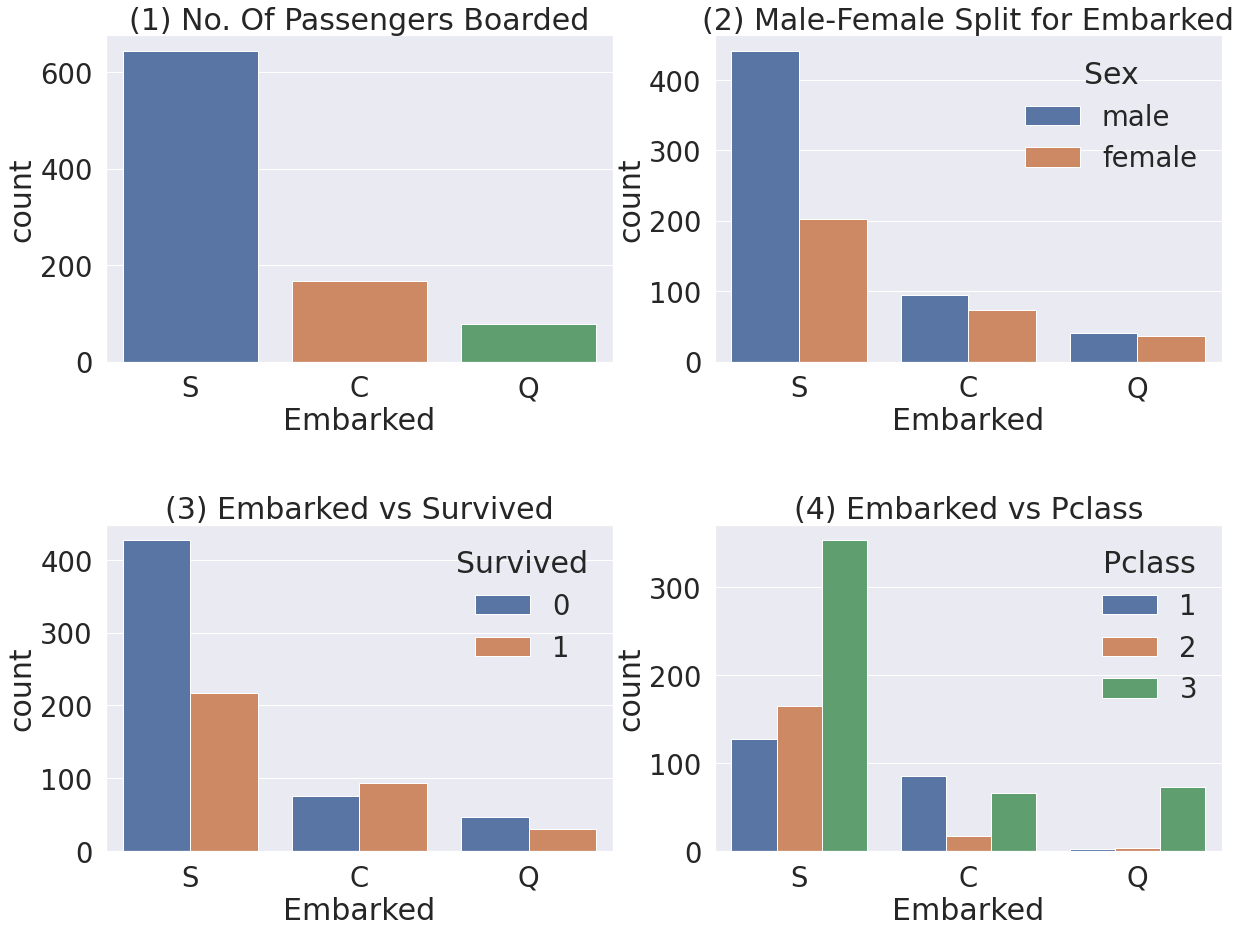

In [37]:
f, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show();

### Figure (1)
S에서 가장 많은 사람이 탑승했다
### Figure (2)
C와 Q는 남녀 비율이 비슷하고 S는 남자가 더 많다
### Figure (3)
생존확률이 S경우 많이 낮은 걸 볼 수 있다
### Figure (4)
Class로 split해서 보니, C가 생존화률이 높은 건 클래스가 높은 사람이 많이 타서 그렇다.
S는 3rd class가 많아서 생존확률이 낮게 나온다

## 3-7. Family - SibSp(형제 자매) + Parch(부모 자녀)

In [38]:
df_train['FamilySize'] = df_train['SibSp']+df_train['Parch']+1 # 자신을 포함해야하니 1을 더해준다
df_test['FamilySize'] = df_test['SibSp']+df_test['Parch']+1
print('Maximum size of Family: ',df_train['FamilySize'].max())
print('Minimum size of Family: ',df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


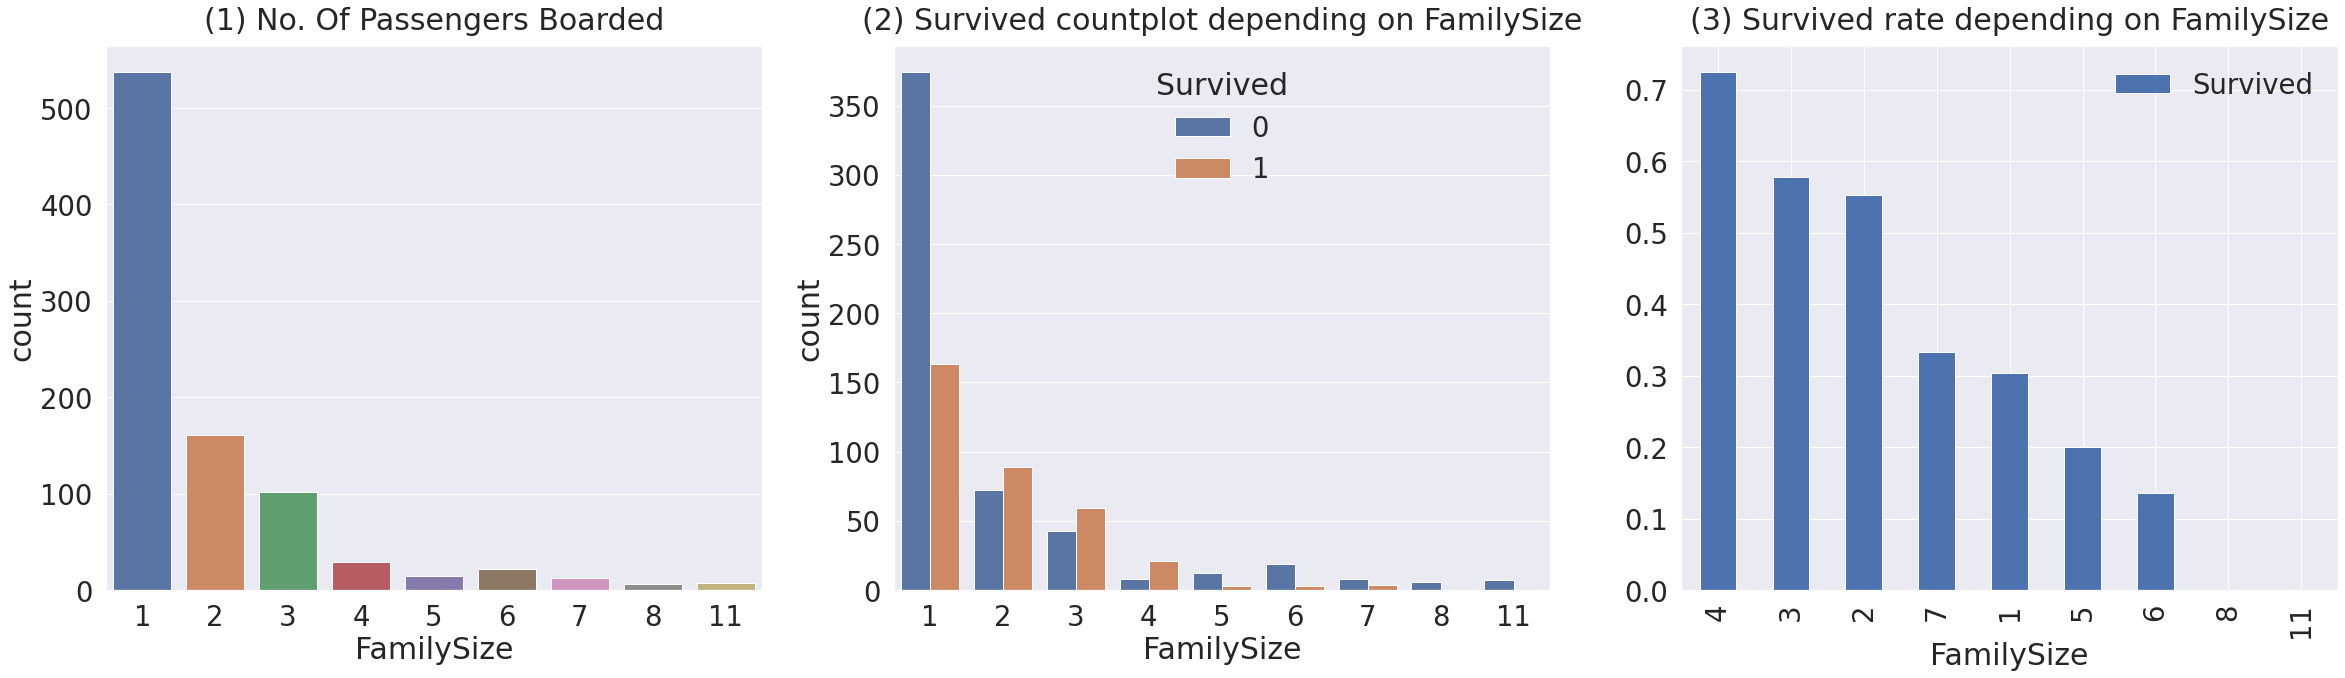

In [39]:
# Family Size와 생존의 관계를 살피기
f, ax = plt.subplots(1,3,figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show();

### Figure (1)
- 가족크기가 1~11까지 있다
- 대부분 1명이고 그 다음으로 2,3,4이다
### Figure (2) / (3)
- 가족크기에 따른 생존비교를 보면, 가족이 4명인 경우 가장 생존확률이 높다
- 가족수가 많아질수록 (5이상) 생존확률이 낮다
- 가족수가 너무 작아도(1명) 너무 많아도 (5인이상) 생존확률이 낮다


## 3-8 .Fare
- 탑승요금이며, continous feature이다

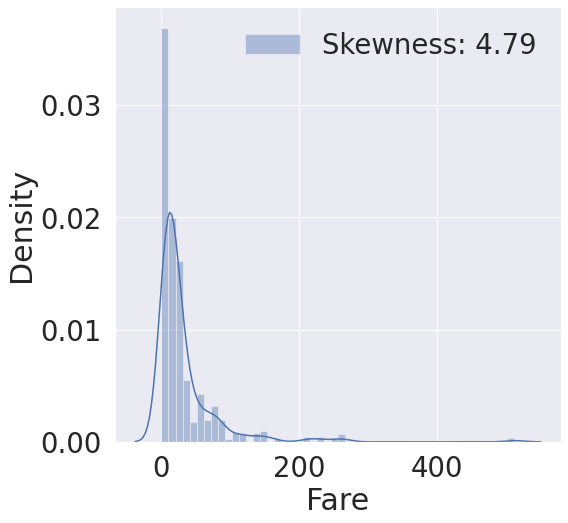

In [40]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- distribution이 매우 비대칭 (high skewness)
- 이대로 모델을 넣어주면 자칫 모델이 잘못 학습할 수도 있다
  - 몇 개 없는 outlier에 대해 너무 민감하게 반응하면 실제 예측 시에 좋지 못한 결과를 부를 수 있다
- outlier의 영향을 줄이기 위해 Fare에 log를 취한다
  - pandas의 map 또는 apply를 사용하면 dataframe의 특정 columns에 공통된 작업을 적용할 수 있다
  - fare columns의 데이터 모두를 log값 취하는 것은 lambda 함수를 이용해 로그를 적용하는 함수를 map에 인수로 넣어주면 적용이 된다

In [41]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() #testset에 있는 nan value를 평균값으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

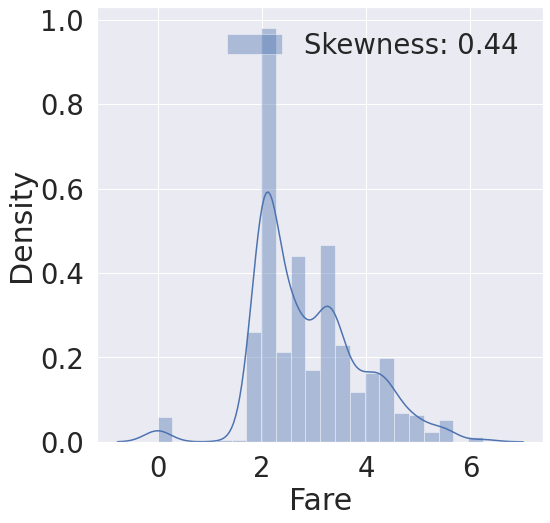

In [42]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log를 취함으로써 비대칭성이 많이 사라졌다
- 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있다
- 사실 방금한 것은 feature engineering에 들어가는 부분인데 작업했다
- 모델을 학습시키기 위해 / 그 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나 새로운 feature를 추가하는 것을 feature engineering이라고 하는데 우리는 이제 그것을 살펴볼 것이다

# 4. Feature Engineering
- 모델을 세우기에 앞서 모델의 성능을 높일 수 있도록 feature들을 enginerring
- one-hot encoding, class로 나누기/ 구간으로 나누기 / 텍스트 데이터 처리 등을 한다

1. dataset에 존재하는 null data를 채우기
2. 아무 숫자로 채울 수는 없고, null data 를 포함하는 feature의 statistics를 참고하거나 다른 아이디어를 짜내어 채우기
3. null data를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지될 수 있기 때문에, 신경써줘야할 부분이다
4. Feature engineering은 실제 모델의 학습에 쓰려고 하는 것이므로 train뿐만 아니라 test도 똑같이 적용해야 한다

## 4-1. Fill Null (Age)
- Age에는 null data가 177개나 있다
  이를 위해 title+statistics를 사용
- 영어에는 Miss, Mrr, Mrs같은 title이 존재한다
  각 탑승객의 이름에는 꼭 이런 title이 들어가게 되는데 이를 사용
- pandas series에는 data를 str로 바꿔주는 str method, 거기에 정규표현식을 적용하게 해주는 extract method가 있다
  이를 사용하여 title을 쉽게 추출할 수 있다
  title을 initial column에 저장

In [43]:
df_train['Initial'] = df_train.Name.str.extract('([A-za-z]+)\.') # Let's extract the salutations
df_test['Initial'] = df_test.Name.str.extract('([A-za-z]+)\.') # Let's extract the salutations
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.564949,NaN,S,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.154870,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.401197,C148,C,1,Mr


In [44]:
# pandas의 crosstab을 이용하여 우리가 추출한 Initial과 Sex간의 count를 살펴보기
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') # Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


위 table 을 참고하여, 남자, 여자가 쓰는 initial 을 구분해 보겠습니다. replace 메소드를 사용하면, 특정 데이터 값을 원하는 값으로 치환해줍니다.

In [45]:
x = pd.Series(df_train['Initial'])
x = list(set(x))
print(x)

df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_train.groupby('Initial').mean()

['Ms', 'Master', 'Lady', 'Mrs', 'Miss', 'Mlle', 'Dr', 'Jonkheer', 'Mme', 'Col', 'Major', 'Sir', 'Mr', 'Don', 'Countess', 'Capt', 'Rev']


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


여성과 관계있는 Miss, Mr, Mrs 가 생존률이 높은 것을 볼 수 있습니다.

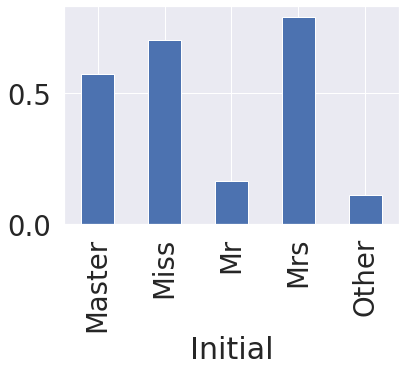

In [46]:
df_train.groupby('Initial')['Survived'].mean().plot.bar();

### Null 채우기
- Null 채우는 방법은 여러가지가 있다

  1) Statistics를 활용 (해당 방법 활용)
  
  2) null data가 없는 데이터를 기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식

- 여기서 statistics는 train data의 것을 의미
- test data는 언제가 unseen으로 둔 상태로 놔야한다
- train에서 얻은 statistic를 기반으로 test의 null data를 채워줘야 한다

- Null 채우는 다른 방법
https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

In [47]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- Age의 평균을 이용해서 Null value를 채우기
  1. pandas dataframe을 다룰 때에는 boolean array를 이용해 indexing하는 방법이 편하다
  2. 아래 코드 첫줄을 해석하면, isnull()이면서 initial이 MR인 조건을 만족하는 row(탑승객)의 'Age'의 값을 33으로 치환한다
  3. loc + boolean + column 을 사용해 값을 치환하는 방법은 자주 쓰이므로 꼭 익숙해집시다.

In [48]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

## 4-2. Fill Null (Embarked)
- Embarked는 Null Value가 2개이고, S에서 가장 많은 탑승객이 있었으므로 S로 채우기
- dataframe에서 fillna method를 이용하면 쉽게 채울 수 있다
- inplace = True로 하면 df_train에 fillna를 실제로 적용

In [49]:
print('Embared has', sum(df_train['Embarked'].isnull()),'Null values')

Embared has 2 Null values


In [50]:
df_train['Embarked'].fillna('S', inplace=True)

## 4-3. Change Age (Continuous to Categorical)
- Age는 현재 continuous feature
- Age를 몇 개의 group으로 나누어 category화 시킬 수 있다
- 때로 continuous를 categorical로 바꾸면 자칫 information loss가 생길 수도 있다.

In [51]:
# apply로 하기
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)

# loc으로 하기
df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [52]:
df_train.drop(['Age'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

## 4-4. Change Initial, Embarked and Sex (String to numerical)

- 현재 initial은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있다
- 카테고리로 표현되어져 있는 데이터를 모델에 input으로 넣을 때 컴퓨터가 인식할 수 있도록 수치화 시켜야 한다
- 사전 순으로 정리하여 mapping

In [53]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [54]:
#해당 열이 어떠한 값들로 이루어져 있는지 확인
df_train['Embarked'].unique()
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [55]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [56]:
# Null값이 없으면 False, 하나라도 있으면 True
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
FamilySize     False
Initial        False
Age_cat        False
dtype: bool

In [57]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})
df_train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,211536,2.564949,NaN,2,1,4,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,3.401197,B42,2,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,3.154870,NaN,2,4,1,2
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,3.401197,C148,0,1,2,2


## 4-5. Feature간의 상관관계
- 두 변수간의 Pearson correlation을 구하면 (-1, 1) 사이의 값을 얻을 수 있다
- -1에 가까우면 음의 상관관계
- 1에 가까우면 양의 상관관계
- 0에 가까우면 상관관계가 없다

### EDA에서 살펴봤듯이, Sex와 Pclass가 Survived에 상관관계가 어느 정도 있다
### Fare와 Embarked도 상괸관계가 있다
### 서로 강한 상관관계를 가지는 Feature들이 없다
  - 모델을 학습시킬 때, 불필요한 feature가 없다는 것을 의미
  - 1또는 -1의 상관관계를 가진 feature A, B가 있다면 우리가 얻을 수 있는 정보는 사실 하나일 것이기 때문이다

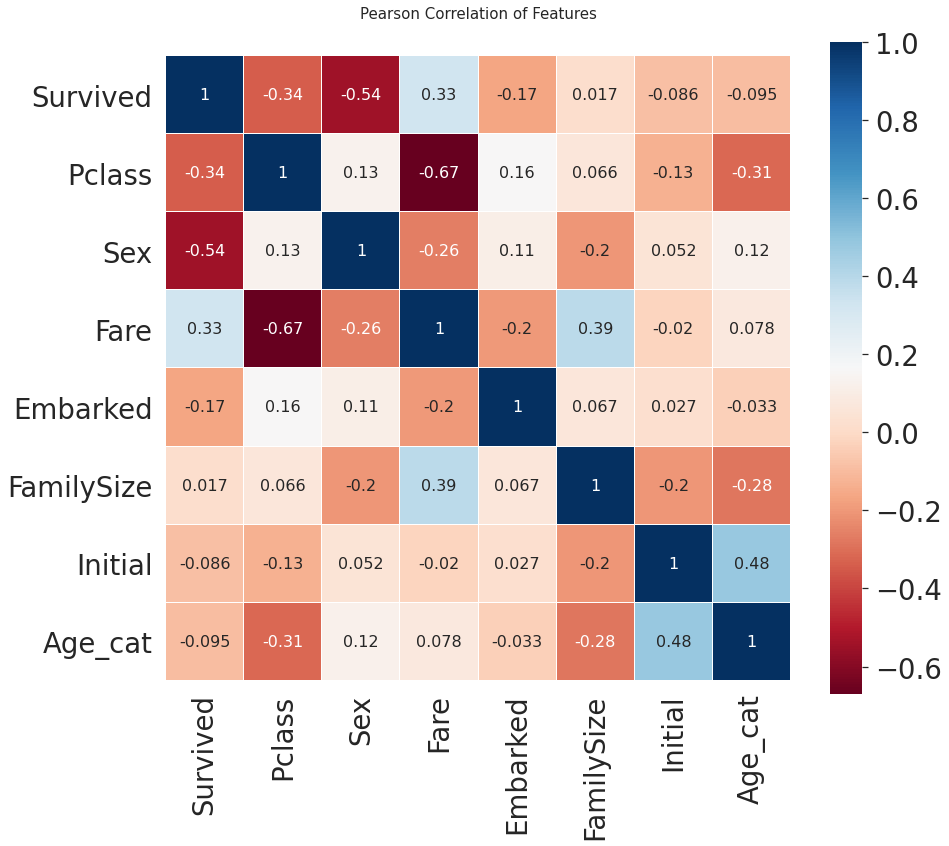

In [58]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax= 1.0, square = True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16})

del heatmap_data

## 4-6.Data Pre-Processing
### One-Hot encoding on Initial and Embarked
- 모델의 성능을 높이기 위해 수치화시킨 카테고리 데이터를 one-hot encoding

In [59]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix = 'Initial')
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix = 'Initial')
df_train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,211536,2.564949,NaN,2,1,2,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,3.401197,B42,2,1,1,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,3.154870,NaN,2,4,2,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,3.401197,C148,0,1,2,0,0,1,0,0


In [60]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix ='Embarked')

## 4-7. Drop Columns

# 5. Model 만들기
- sklearn을 사용해 모델 만들기

In [61]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_train

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,2.564949,1,2,0,0,0,0,1,0,0,1
887,1,1,0,3.401197,1,1,0,1,0,0,0,0,0,1
888,0,3,0,3.154870,4,2,0,1,0,0,0,0,0,1
889,1,1,1,3.401197,1,2,0,0,1,0,0,1,0,0


## 5-1. Building Machine Learning model and Prediction using the trained model

In [62]:
# importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # 모델의 평가
from sklearn.model_selection import train_test_split # training set을 쉽게 나눠주기

### Traget인 Survived는 0과 1로 이루어져 있으므로 해당 문제는 binary classification이다
- train set의 survivied를 제외한 input을 가지고 모델을 최적화시켜 각 샘플(탑승객)의 생존유무를 판단하는 모델을 만든다
- 그 후 모델이 학습하지 않은 test set으로 test set의 각 샘플의 생존 유무를 예측

# Model 학습 및 예측
- trainset을 가지고 모델을 학습
- testset을 가지고 prediction

## 5-2. Preparation
### Split dataset into train, valid, test set

- 학습에 쓰일 데이터와 target label를 분리
- 마치 축구대표팀이 팀훈련(train)을 하고 바로 월드컵(test)로 나가는 것이 아니라, 팀훈련(train)을 한 다음 평가전(valid)를 거쳐 팀의 훈련 정도(학습정도)를 확인하고 월드컵(test)에 나가는 것과 비슷하다

In [63]:
X_train = df_train.drop('Survived', axis =1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [64]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

## 5-3. Model Generation and Prediction
## RandomForest Model
- 결정트리기반 모델
- 여러 결정트리들을 앙상블한 모델
- 랜덤포레스트 분류기에 여러 파라미터들이 있다
  1. n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf 등 여러 파라미터들이 존재합니다. 
  2. 이것들이 어떻게 세팅되냐에 따라 같은 데이터셋이라 하더라도 모델의 성능이 달라집니다.
  3. 파라미터 튜닝은 시간, 경험, 알고리즘에 대한 이해 등이 필요합니다 (해당 모델에서는 default값으로 수행)
- 모델 객체를 만들고 fit 메소드로 학습시키기
- valid set input을 넣어서 예측값(X_vld sample의 생존여부)을 얻는다

In [65]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

# 6. Model 평가
- 예측 성능이 원하는 수준인지 판단

In [66]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.46% 정확도로 생존을 맞춤


## 6-1. Feature Importance
- 학습된 모델은 feature importance를 가지게 된다
  - 이것을 통해 지금 만든 모델이 어떤 feature에 영향을 많이 받았는지 확인할 수 있다
- 우리가 얻은 모델에서는 Fare가 가장 큰 영향력을 가진다
- Feature Importance는 지금 모델에서의 importance를 나타낸다. 만약 다른 모델을 사용하게 되면 다른 feature importance가 다르게 나올 수 있다
- 이 feature importance를 보고 실제로 fare가 중요한 feature일 수 있다고 판단을 내릴 수 있지만 이것은 모델에 귀속되는 하나의 결론이기 때문에 통계적으로 좀 더 살펴보긴 해야한다
- feature importance를 가지고 좀 더 정확도가 높은 모델을 얻기 위해서 feature selection을 할 수도 있고 좀 더 빠른 모델을 위해 feature를 제거할 수도 있다.

In [67]:
from pandas import Series
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns)

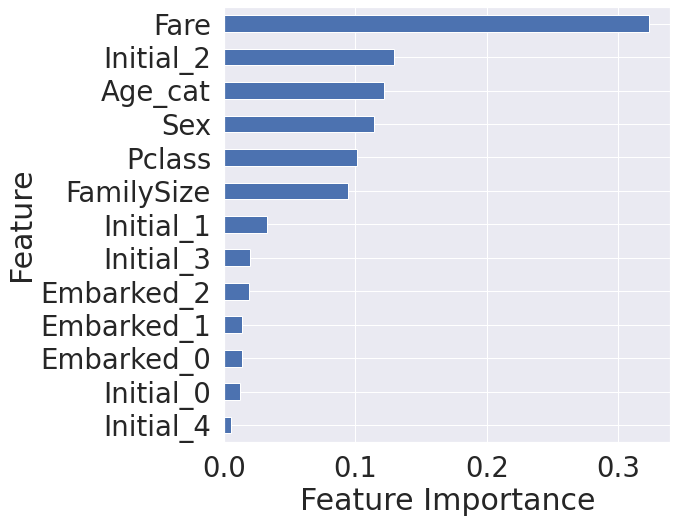

In [68]:
plt.figure(figsize = (8,8))
Series_feat_imp.sort_values(ascending = True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show();

## 6-2. Prediction on Test set
- 생존 여부를 예측
- 이 결과는 실제로 submission(캐글)이므로 결과는 leaderboard에서 확인할 수 있다

In [73]:
url_sub = '/content/gender_submission.csv'
submission = pd.read_csv(url_sub)
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [76]:
prediction = model.predict(X_test)
submission['Survived'] = prediction
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [77]:
submission.to_csv('./my_first_submission.csv', index=False)
submission = pd.read_csv('my_first_submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [78]:
# !kaggle competitions submit -c titanic -f my_first_submission.csv -m "2차 제출"

100% 2.77k/2.77k [00:01<00:00, 1.80kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster